# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Based on API documentation: https://openweathermap.org/current#name
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # Format specification: https://openweathermap.org/current#example_JSON
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mossel bay
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | serang
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | maralal


Processing Record 9 of Set 1 | labytnangi
Processing Record 10 of Set 1 | ndjole
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | kampene
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | ad darb
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | almeirim
Processing Record 21 of Set 1 | weno
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | talnakh
Processing Record 24 of Set 1 | bethel
Processing Record 25 of Set 1 | lerwick
Processing Record 26 of Set 1 | ghat
Processing Record 27 of Set 1 | tazovsky
Processing Record 28 of Set 1 | thompson
Processing Record 29 of Set 1 | usogorsk
Processing Record 30 of Set 1 | los osos
Processing Record 31 of Set 1 | praia da vitoria
Processing Record 32 of Set 1 | 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mossel bay,-34.1831,22.1460,289.11,90,97,2.33,ZA,1713887389
1,sitka,57.0531,-135.3300,282.09,49,75,1.54,US,1713886969
2,puerto natales,-51.7236,-72.4875,284.40,50,75,8.23,CL,1713887142
3,serang,-6.1149,106.1502,299.39,88,100,0.44,ID,1713887400
4,port elizabeth,-33.9180,25.5701,292.31,77,0,2.06,ZA,1713887401


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mossel bay,-34.1831,22.1460,289.11,90,97,2.33,ZA,1713887389
1,sitka,57.0531,-135.3300,282.09,49,75,1.54,US,1713886969
2,puerto natales,-51.7236,-72.4875,284.40,50,75,8.23,CL,1713887142
3,serang,-6.1149,106.1502,299.39,88,100,0.44,ID,1713887400
4,port elizabeth,-33.9180,25.5701,292.31,77,0,2.06,ZA,1713887401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

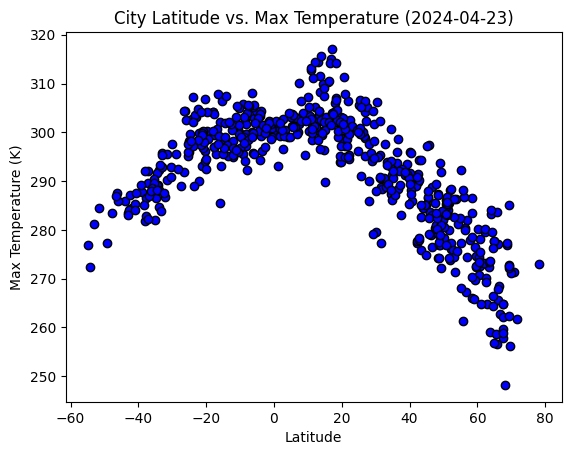

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

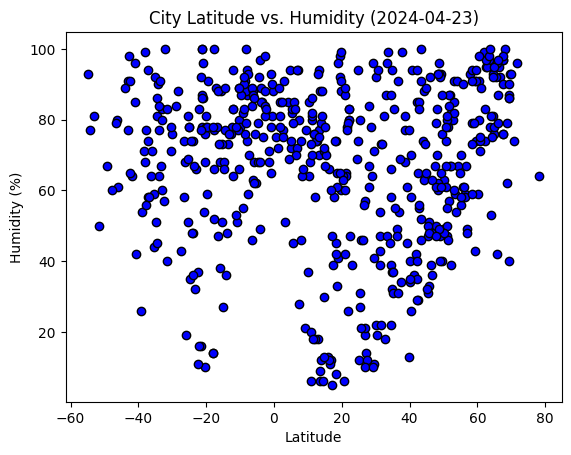

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

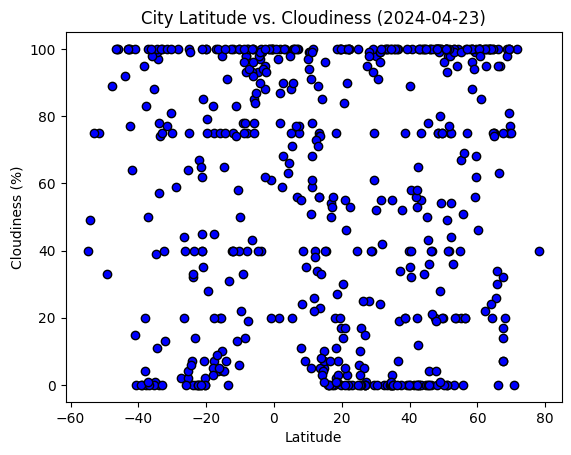

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

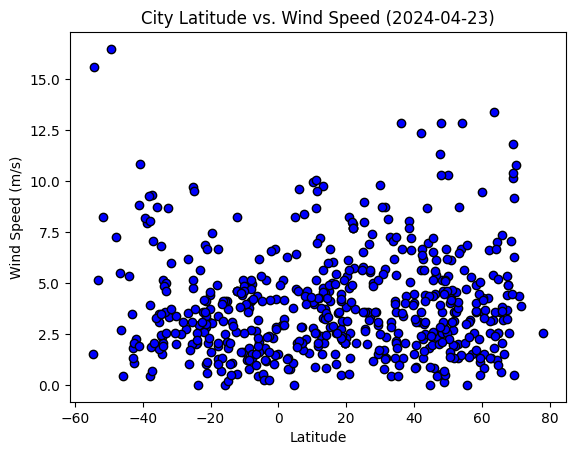

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots

def plot_regression(x_values, y_values, pos):
  """
  Call this function to add a linear regression to the current in-progress plot.
  """
  regression = linregress(x_values, y_values)
  plt.plot(x_values, regression.slope * x_values + regression.intercept, "r-")
  plt.annotate(f"y={regression.slope:0.2f}x + {regression.intercept:0.2f} (r={regression.rvalue:.2f})", pos, xycoords="axes fraction", fontsize=10, color="red")
  print(regression.rvalue)

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,282.09,49,75,1.54,US,1713886969
7,maralal,1.0968,36.6980,293.02,72,97,2.94,KE,1713887401
8,labytnangi,66.6572,66.4183,262.80,92,95,1.54,RU,1713887283
10,vorgashor,67.5833,63.9500,259.64,97,17,3.70,RU,1713887402
14,ad darb,17.7229,42.2526,304.26,58,0,3.51,SA,1713887363


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mossel bay,-34.1831,22.1460,289.11,90,97,2.33,ZA,1713887389
2,puerto natales,-51.7236,-72.4875,284.40,50,75,8.23,CL,1713887142
3,serang,-6.1149,106.1502,299.39,88,100,0.44,ID,1713887400
4,port elizabeth,-33.9180,25.5701,292.31,77,0,2.06,ZA,1713887401
5,bengkulu,-3.8004,102.2655,299.14,89,100,1.74,ID,1713887179


###  Temperature vs. Latitude Linear Regression Plot

-0.8733601831644863


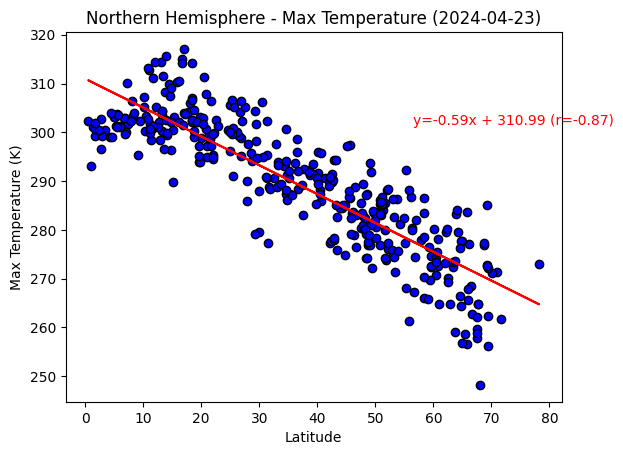

In [46]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title(f"Northern Hemisphere - Max Temperature ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0.7, 0.75))
plt.show()

0.7828823506652363


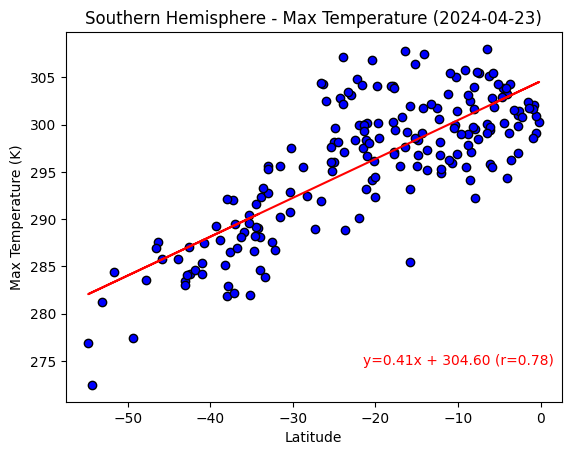

In [47]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title(f"Southern Hemisphere - Max Temperature ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (0.6, .1))

**Discussion about the linear relationship:** There is a strong correlation (r-values) between 'Latitude' and 'Max Temperatures'.  As we go away from the equator, the temperatures are generally lower.  That said, the reason for the difference in the correlation coefficients between the northern hemisphere (87%) and the southern hemishpere (78%) may be due to other variables such as water area versus land mass, altitude from sea-level (e.g. freezing temperatures on the Himalaya mountains, even though it is located in the temperate zone), etc.  The outlier in the southern hemisphere (approx. Latitude at -14, closer to equator; Max Temperature at 284K, in the colder ballpark range) may be an island enjoying cooler temperatures. 

### Humidity vs. Latitude Linear Regression Plot

0.23327914130583005


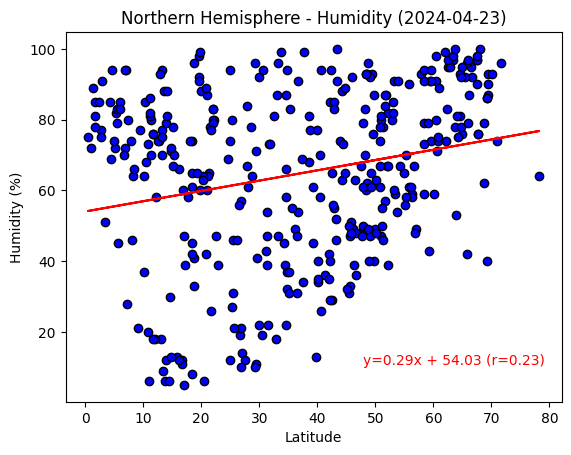

In [39]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (0.6, 0.1))

0.12322572106751792


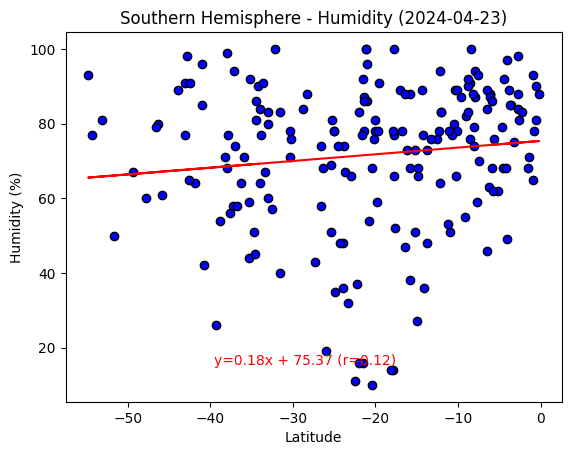

In [40]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (0.3, 0.1))

**Discussion about the linear relationship:** Both the northern and southern hemispheres show a weak correlation between Latitude and Humidity, at 23% and 12% respectively.  This illustrates that distance from the equator is not a driver of humidity. Interestingly, in the northern hemisphere, as we get closer to the north pole, humidity seems to be increasing, while at lower latitude (where temperatures could be high), humidity is spread between the low (higher altitude, away from water areas) and high (closer to water areas) ranges. Hence, humidity may be driven more by other variables such as proximity to water areas, altitude from sea-levels, and max temperatures.  

### Cloudiness vs. Latitude Linear Regression Plot

0.14475089658134435


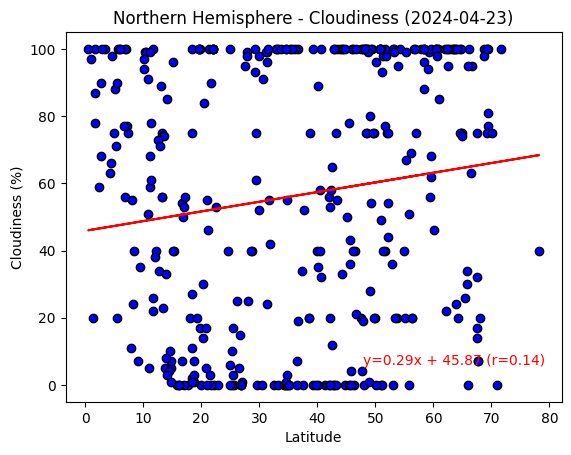

In [41]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (0.6, 0.1))

0.15849111171178223


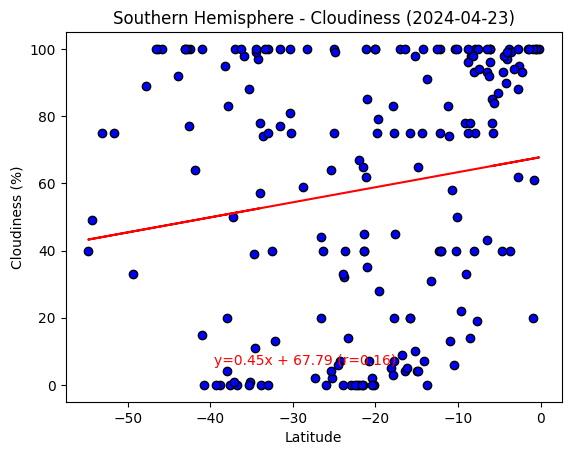

In [42]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (0.3, 0.1))

**Discussion about the linear relationship:** The low correlation coefficients of 14.5% and 15.8% respectively in both the northern and southern hemispheres indicates the absence of significant correlation between cloudiness Latitude.  This may be due to the fact that cloudiness may be driven by other factors (such as having both proximity to water area and high temperature). For example, the Sahara desert that is closer to equator but not near the water area, may not get cloudy.  Similarly, places that are closer to the poles with surrounding water areas but not getting high temperatures, may not see much cloudiness, while a place like southern India with long coastline and a close proximity to the equator, may get severe cloudiness in the monsoon season. 

### Wind Speed vs. Latitude Linear Regression Plot

0.029603133126026193


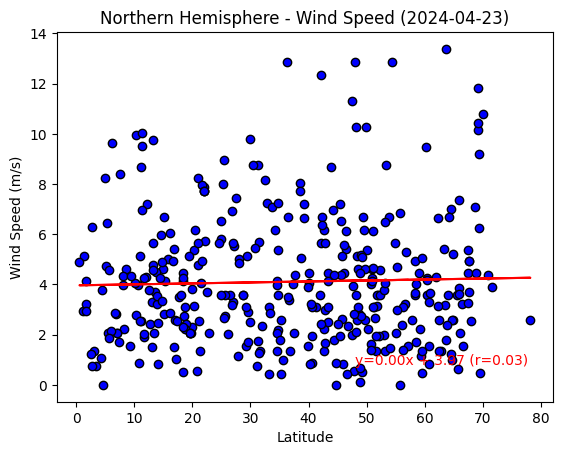

In [43]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Northern Hemisphere - Wind Speed ({time.strftime('%Y-%m-%d')})")

plot_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (0.6, 0.1))

-0.3412223349667955


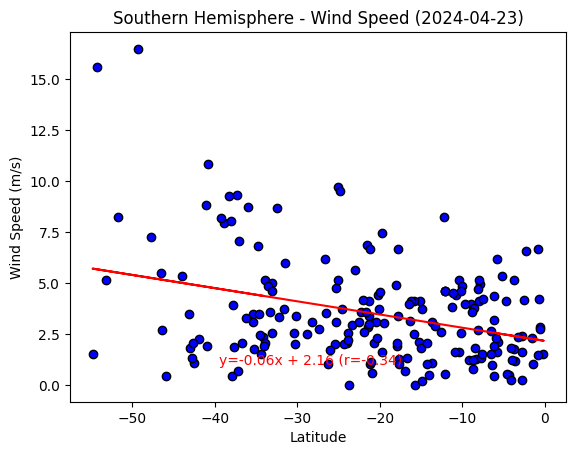

In [44]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Southern Hemisphere - Wind Speed ({time.strftime('%Y-%m-%d')})")

plot_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (0.3, 0.1))

**Discussion about the linear relationship:** While the northern hemisphere shows an even distribution of wind speeds across latitudes with a coefficient coefficient of 29.6%, the southern hemisphere shows a higher correlation at 34.1%.  Eyeballing the chart, it looks like there are more datapoints in the north (and stronger winds), as we get closer to both the equator and the north pole. 

Eyeballing the southern hemisphere chart, we see a difference in the range of the distribution of wind speeds along the y-axis.  In the southern hemisphere, we note that most of the datapoints are closer to the equator and in the low to medium wind speeds' range (compared to northern hemisphere, which has stronger winds as well in both the regions closer to the equator as well as the regions closer to the pole).  

Would the relatively fewer datapoints in the southern hemisphere, especially closer to the south pole (-50 and further south) perhaps due to more water areas than land mass in the region, explain the difference with the northern hemisphere (relating to the above-mentioned distribution of wind speeds along the y-axis).  And with such fewer stations being mostly located in the windiest places, the regression line could have a steeper slope?   